# THE MONTY HALL PROBLEM

### A hypothetical game show

- Three doors, one with a car behind, two with goats (random equal chance)
- Contestant chooses one door
- The host then opens one of the other doors
    - The host will always opens one of the goat doors, and never the car door
- The contestant is left with two doors, the one the picked at the start and the un-releaved one
    - Contestant is giving the choice of staying or switching doors
- Which option gives the contestant a higher probability of winning the car?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
doors = [1, 2, 3]
car_door = np.random.randint(1,4)

In [3]:
picked_door = int(input('Please pick a door between 1 and 3: '))

Please pick a door between 1 and 3: 1


In [4]:
goat_doors = [door for door in doors if door != car_door]

In [6]:
reveal_doors = [door for door in goat_doors if door != picked_door]
if len(reveal_doors) == 2:
    opened_door = np.random.choice(reveal_doors)
else:
    opened_door = reveal_doors[0]

opened_door

2

In [7]:
doors.remove(opened_door)
doors

[1, 3]

In [11]:
new_choice = int(input('Please pick either the same door or switch to the other door: '))
if new_choice == car_door:
    print(f'Congrats you just won a {np.random.choice(car_list)}')
else:
    print(f"Here's a goat, try again later")

Please pick either the same door or switch to the other door: 3
Congrats you just won a Barbie SUV


In [12]:
stay = []
switch = []
doors = [1,2,3]

games = range(10**4)
for game in games:

    # randomly assign the Ferrari behind door 1,2, or 3
    ferrari_door = np.random.randint(1,4)
    
    # random assign a guess for the contestant
    contestant_guess = np.random.randint(1,4)
    
    # goat doors are the doors that are not hiding the Ferrari 
    goat_doors = [door for door in doors if door != ferrari_door]
   
    # host reveals a goat. Note, if the host has 2 doors to choose from,
    # it is because the contestant_guess == ferrari_door
    # If the host has only 1 door to choose from, then contestant_guess != ferrari_door
    possible_reveal_doors = [door for door in goat_doors if door != contestant_guess]
    if len(possible_reveal_doors) == 2:
        reveal_door = np.random.choice(possible_reveal_doors)
    else:
        reveal_door = possible_reveal_doors[0]
       
    # Define the door that the contest would switch to
    # We only care about the sole element of this list
    switch_door = [door for door in doors if door != contestant_guess and door != reveal_door][0]

    # Let's record the results of our model over 10^4 switching or staying outcomes
    if ferrari_door == switch_door:
        switch.append(1)
        stay.append(0)
    else:
        switch.append(0)
        stay.append(1)

In [13]:
print(f'Probability of winning if you don\'t switch: {np.mean(stay)}')
print(f'Probability of winning if you switch doors: {np.mean(switch)}')

Probability of winning if you don't switch: 0.3283
Probability of winning if you switch doors: 0.6717


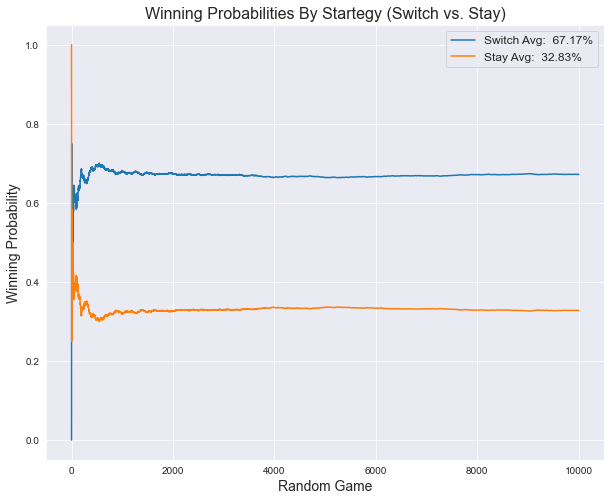

In [14]:
# Create figure and add subplot
fig = plt.figure(figsize = (10,8));
ax = fig.add_subplot(111);

# Redefine environments and define winning % for each environments in environments
games = range(1,10**4+1)
switch_probs = [np.mean(switch[:game]) for game in games]
stay_probs = [np.mean(stay[:game]) for game in games]

# Generate line graphs of win probabilites for each environment
ax.plot(games, switch_probs, label=f"Switch Avg: {np.mean(switch) : 0.2%}");
ax.plot(games, stay_probs, label=f"Stay Avg: {np.mean(stay) : 0.2%}");

# Add labels
ax.set_title("Winning Probabilities By Startegy (Switch vs. Stay)", {'fontsize' :  16});
ax.set_ylabel("Winning Probability", {'fontsize' :  14});
ax.set_xlabel("Random Game", {'fontsize' :  14});

# Add legend
ax.legend(fontsize = 'large');

* Code citation https://github.com/jprinfret/monty_hall_problem - Former Flatrion Grad

In [9]:
car_list = ['Ferrari', 'Barbie SUV', 'Big Wheelz Trike', 'Hot Wheels Monster Truck', 'Porsche 911', 'Soccer Mom Van', 'Mid Life Crisis Convertible', 'Street Racer NSX', 'Just Side-car No Motorcycle', 'Cozy Coupe (Little Tikes)']